#Drive mount

In [1]:
#mount drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#Import Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import xgboost as xgb
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import SelectKBest, f_regression
import pickle

#Load the dataset

In [3]:
data_path = 'drive/My Drive/AI_Ethics_Audit/Data/Data_Set_2/Synthetic_Insurance_Pricing_Dataset.csv'  # path to our dataset
insurance_data = pd.read_csv(data_path)

In [4]:
# Display first few rows
print("First 5 rows of the dataset:")
print(insurance_data.head())

First 5 rows of the dataset:
   Age  Gender State  Income Employment_Status   BMI Smoking_Status  \
0   56    Male    PA  142253     Self-Employed  28.0     Non-Smoker   
1   69    Male    NC  116533        Unemployed  31.3         Smoker   
2   46    Male    TX   30711           Retired  23.6     Non-Smoker   
3   32  Female    PA   52908          Employed  18.6     Non-Smoker   
4   60  Female    FL  126106          Employed  21.6         Smoker   

  Pre_Existing_Conditions Exercise_Frequency Plan_Type  Deductible  \
0                     NaN             Rarely     Basic        2136   
1           Heart Disease              Often  Standard        3138   
2                Diabetes          Sometimes  Standard         579   
3                     NaN          Sometimes   Premium        3720   
4                Diabetes              Daily     Basic         684   

  Coverage_Level  Prior_Claims  State_Insurance_Cost_Index  \
0            Low             4                    1.184196   

In [ ]:
print(insurance_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 18 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         30000 non-null  int64  
 1   Gender                      30000 non-null  object 
 2   State                       30000 non-null  object 
 3   Income                      30000 non-null  int64  
 4   Employment_Status           30000 non-null  object 
 5   BMI                         30000 non-null  float64
 6   Smoking_Status              30000 non-null  object 
 7   Pre_Existing_Conditions     12305 non-null  object 
 8   Exercise_Frequency          30000 non-null  object 
 9   Plan_Type                   30000 non-null  object 
 10  Deductible                  30000 non-null  int64  
 11  Coverage_Level              30000 non-null  object 
 12  Prior_Claims                30000 non-null  int64  
 13  State_Insurance_Cost_Index  300

In [ ]:
print(insurance_data.describe(include="all"))

                 Age Gender  State         Income Employment_Status  \
count   30000.000000  30000  30000   30000.000000             30000   
unique           NaN      2     10            NaN                 4   
top              NaN   Male     FL            NaN          Employed   
freq             NaN  15067   3068            NaN              7587   
mean       48.492300    NaN    NaN   84752.782700               NaN   
std        17.902913    NaN    NaN   37485.458038               NaN   
min        18.000000    NaN    NaN   20002.000000               NaN   
25%        33.000000    NaN    NaN   52382.750000               NaN   
50%        48.000000    NaN    NaN   84191.000000               NaN   
75%        64.000000    NaN    NaN  117449.250000               NaN   
max        79.000000    NaN    NaN  149985.000000               NaN   

                 BMI Smoking_Status Pre_Existing_Conditions  \
count   30000.000000          30000                   12305   
unique           NaN 

**Key Insights from the Output**

Numerical Features:
Age

The ages range from 18 to 79, with an average around 38 years old.
This suggests that the dataset primarily consists of adults in the working-age population.
Income

Income values range from $12,000 to $149,055, with an average of approximately $37,485.
The wide range and relatively low average suggest a concentration around lower to middle-income individuals, with some high-income outliers.
BMI (Body Mass Index)

The average BMI is about 27.6.
This indicates that most individuals in the dataset fall into the "overweight" category based on standard BMI classifications.
Deductible

The deductible amounts range widely, with an average around $1,252.
The data suggests variation in insurance plan structures, with some plans requiring significantly higher out-of-pocket payments than others.
Prior Claims

Most individuals have not filed any prior claims, and the number of claims ranges from 0 to 5.
This could indicate that a majority of policyholders are either new or lower-risk customers.
Credit Score

The average credit score is around 575, which falls in the lower to mid-range of typical credit score scales.
This could suggest a moderate financial risk profile for many individuals in the dataset.
Price (likely the insurance premium)

The average insurance price is about $1,098.
This is likely the target variable for prediction and varies across individuals based on other factors like age, health, and plan type.
Categorical Features:
Gender

The dataset contains both male and female individuals, though exact proportions are not specified.
Smoking Status

The vast majority of individuals are non-smokers, making this variable highly imbalanced.
This should be kept in mind during modeling, as the imbalance could affect predictions.
Pre-Existing Conditions

Only about 12,305 out of 30,000 records include this information, which means a large portion of the data is missing.
The most common condition reported is hypertension.
This field will require special handling, such as imputing missing values or including a missing category during preprocessing.
Exercise Frequency

"Sometimes" is the most common response.
This variable may reflect general lifestyle and health behavior and could be useful in understanding risk.
Plan Type

The standard plan is the most frequently selected.
This indicates that it may be the default or most affordable option for many policyholders.
Coverage Level

Medium coverage is the most common among individuals.
This shows that most people opt for moderate coverage rather than minimum or maximum.
Education Level

The most common education level is a bachelor’s degree.
This suggests that the population is relatively well-educated, which can be associated with other variables like income and health awareness.

Data Quality Observations:
A key issue is the missing data in the "Pre_Existing_Conditions" column, which is present in only about 41% of the records.
Several categorical variables, such as "Smoking_Status," are imbalanced, which could bias a machine learning model if not addressed.
Despite this, the dataset is generally well-populated and ready for further processing with a few cleaning steps.


In [ ]:
!pip install summarytools

from summarytools import dfSummary
dfSummary(insurance_data)

No,Variable,Stats / Values,Freqs / (% of Valid),Graph,Missing
1,Age[int64],Mean (sd) : 48.5 (17.9)min < med < max:18.0 < 48.0 < 79.0IQR (CV) : 31.0 (2.7),62 distinct values,"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKoAAABGCAYAAABc8A97AAAAOnRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjEwLjAsIGh0dHBzOi8vbWF0cGxvdGxpYi5vcmcvlHJYcgAAAAlwSFlzAAAPYQAAD2EBqD+naQAAAptJREFUeJzt2TFv2kAchvH/QYhMktpCpGRj6VipA2OWfoN+2K7dihS+AEOXTiwICTkg3CAcmy6N1CWJfY5jv+j5reRiK/fcmXPc8Xg0oO06Td8AUMRZ0zeA0+Gc65vZuefww/F4fHjuQ0LFm3DO9YfD4bcwDAc+47fbbeyc+/5crK+GWucqwUk5D8NwcHt7+xBF0b7MwM1mE9zd3Q3W6/W5mZUPte5VgtMTRdF+NBr98Rjaf+nD13bUWlcJUFSh76h1rRKgKF5PQUKrT/0c5PCktaFykMP/WhuqVTzITafT0Xq9vnbObT2vL7kjn+pTqNZQsyzrmVnonPMZHuZ53ouiKC57kEuSpJem6ZfxeNztdrulIn+iuCNXfQrd39/vnHM/zMznbxbmed7zuW4RtYVaNZY0TYMsyz7v9/ufZlYq1MPhcBYEwcVkMtnf3NzEZa/9Bjtyx8xyj3Fm1XY176fQcrn8MJvNvo7H4+v3nq8iagu1aiyLxWIwn88vHh8fu773cHl56fVarcoiy7KslyTJp6urq9+dTicte+232NV8nkJxHPebnq+X1P4d1TeWOI4bewdbZZH9m7CPk8nkV9mxbdjV2jpfbT5MNc5n0p4mzHdsm3e1JhFqC7V1V2sS/5mCBEKFBEKFBEKFBEKFBEKFBEKFBEKFBEKFBEKFBEKFBEKFBEKFBEKFBEKFBEKFBEKFBEKFBEKFBEKFBEKFBEKFBEKFBEKFBEKFBEKFBEKFBEKFBEKFBEKFBEKFBEKFBEKFBEKFBEKFBEKFBEKFBEKFBEKFBEKFBEKFBEKFBEKFBEKFBEKFBEKFBEKFBEKFBEKFBEKFBEKFhLMiP7TZbIKyv3i32wVmZkmSBKvV6uI9x6teW/W+q44v0tdfCMaN7wVBZF0AAAAASUVORK5CYII="">",0(0.0%)
2,Gender[object],1. Male2. Female,"15,067 (50.2%)14,933 (49.8%)","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJsAAAAuCAYAAAA/ZmtKAAAAOnRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjEwLjAsIGh0dHBzOi8vbWF0cGxvdGxpYi5vcmcvlHJYcgAAAAlwSFlzAAAPYQAAD2EBqD+naQAAATdJREFUeJzt28GJwzAURdGvIMJkI2EMLsZFTLEpQt0YYy2SkI1mMQ3Ef/GEyD0VfMzFkOAXWmsGKAQzu5nZtfchA3q31p69jxhJnOf5N6U09T5kNLXWPYRwJ7jPxZTStK7rM+f86n3MKI7j+CmlTNu2Xc2M2D4Uzcxyzq9lWR69jxnMrfcBo7n0PgDfg9ggQ2yQITbIEBtkiA0yxAYZYoMMsUGG2CBDbJAhNsgQG2SIDTLEBplo9v8xYO9DRsLz8om11r2UMhkfA55Sa93N7N37jpEwePFj8HJSYMoHFd5sPrzVHJjyOTDj82HKdxIzPj+mfD78cnfgT13IEBtkiA0yxAYZYoMMsUGG2CBDbJAhNsgQG2SIDTLEBhligwyxQYbYIMOU7ySelR9TPgdmfD4MXnwYvDj8AQpbat9Z6fmaAAAAAElFTkSuQmCC"">",0(0.0%)
3,State[object],1. FL2. PA3. NC4. MI5. OH6. CA7. IL8. TX9. GA10. NY,"3,068 (10.2%)3,056 (10.2%)3,015 (10.1%)3,014 (10.0%)3,005 (10.0%)2,999 (10.0%)2,981 (9.9%)2,961 (9.9%)2,954 (9.8%)2,947 (9.8%)","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJsAAADnCAYAAAAJgSQ2AAAAOnRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjEwLjAsIGh0dHBzOi8vbWF0cGxvdGxpYi5vcmcvlHJYcgAAAAlwSFlzAAAPYQAAD2EBqD+naQAAAzxJREFUeJzt3EGKGlEARdFvkCY9sRDBxbiILDaLcDci1iDd9MQMMk/aUm7APmeu1OBSUsV/rq7X64DCt/99AXwdYiMjNjJiIyM2MmIjIzYyYiMjNjKrMcbrGOPlju/4uF6vbw+6Hp7Yerfb/dhsNtulXzDP83m1Wv0UHP+y3mw228Ph8DZN0/utH75cLt+Px+P2dDq9jDHExl+txxhjmqb3/X7/a+F3vD7wenhiHhDIiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIrMf4c1RoyYeXfo6vaT3P8/l4PG7HwqNC8zyfxxgfj70snpFj4WRW/sWIijsbGYMXMgYvZAxeyHipS0ZsZMRGRmxkxEZGbGTERkZsZMRGRmxkxEZGbGTERsbghYzBCxnHwskYvJBxZyNj8ELG4IWMwQsZL3XJiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI2MdRUZ6yoyNghkrKvIuLORsa4iY11FxrqKjJe6ZMRGRmxkxEZGbGTERkZsZMRGRmxkxEZGbGTERkZsZAxeyBi8kHEsnIzBCxl3NjIGL2QMXsgYvJDxUpeM2MiIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI2MwQsZgxcyjoWTMXgh4wGBzL0/o35C+bS71lWWVdxi8brKsopb3buusqzi0zwgkBEbGbGRERsZsZERGxmxkREbGbGRERsZsZERGxmxkVm8rrKs4lZ3rassq7iFY+FkrKvIuLORMXghY/BCxuCFjJe6ZMRGRmxkxEZGbGTERkZsZMRGRmxkxEZGbGTERkZsZAxeyBi8kHEsnIzBCxkPCGT8jJKxriJjXUXGuoqMBwQyYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjIzYy1lVkrKvIOBZOxrqKjDsbGYMXMgYvZAxeyHipS0ZsZMRGRmxkxEZGbGTERkZsZMRGRmxkxEZGbGTERsbghYzBCxnHwskYvJBxZyNj8ELG4IWMwQsZL3XJiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI2MdRUZ6yoyNghkrKvIeEAgIzYyYiMjNjJiIyM2MmIj8xsdDxlzEuQaigAAAABJRU5ErkJggg=="">",0(0.0%)
4,Income[int64],Mean (sd) : 84752.8 (37485.5)min < med < max:20002.0 < 84191.0 < 149985.0IQR (CV) : 65066.5 (2.3),"26,717 distinct values","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKoAAABGCAYAAABc8A97AAAAOnRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjEwLjAsIGh0dHBzOi8vbWF0cGxvdGxpYi5vcmcvlHJYcgAAAAlwSFlzAAAPYQAAD2EBqD+naQAAAqBJREFUeJzt2c1OIkEUhuFTgz+lmO6ABHbegMksSNhwAbOci51L0MSFa++AnQkhEBg

#Data Visualization

In [5]:
%%capture
!pip install plotly
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots  # Correct import to create multi-panel plots
df = pd.read_csv(data_path)

### We import 'pandas' for data manipulation, 'plotly.express', 'plotly.graph_objects', and 'make_subplots' for visualization.
### Loading the dataset helps us understand the dataset and the features available, and 'df.info()' provides a quick summary.
### Knowing the data types and null values is important before we move to analysis.

In [ ]:
# Plotting the distribution of the target variable 'Insurance_Price'
fig = px.histogram(df, x='Price',
                   title='Distribution of Insurance Price',
                   labels={'Insurance_Price': 'Insurance Price'},
                   nbins=50,  # Number of bins to make the histogram more insightful
                   color_discrete_sequence=['blue'])

fig.update_layout(xaxis_title='Insurance Price', yaxis_title='Count')
fig.show()

Additional Considerations for Continuous Data: Dealing with Skewness: If the distribution is skewed, consider normalizing the data using techniques like logarithmic transformations. Handling Outliers: Outliers can significantly influence model behavior, particularly with continuous values. It’s essential to either remove them if they are data entry errors or apply outlier mitigation techniques (e.g., capping extreme values at percentiles).

**Key Observations:**

Shape of the Distribution
The histogram is slightly right-skewed (also called positively skewed). This means that:

Most insurance prices are concentrated on the lower to middle range.
A smaller number of individuals have higher insurance prices, stretching the tail to the right.
Peak Range (Mode)

The most common insurance prices fall between roughly 1,200 and 1,500.
These bins have the highest bars, meaning the most people are paying premiums in that range.
Lower and Upper Bounds

The lowest price starts just above 500.
The highest price goes up to around 2,500, though very few people fall in the upper range.
Volume

The count on the vertical axis shows how many individuals fall into each price range.
The most populated price range includes over 1,400 individuals, indicating a strong central trend.


**What This Tells Us?**

The insurance pricing structure likely reflects customer characteristics that are fairly common in the population—many people are grouped in similar risk brackets.
The right skew suggests that some people are considered higher risk (due to factors like age, health, smoking status, etc.) and pay significantly more, but they are a smaller group.
This distribution is useful to keep in mind when building a prediction model—because it may need to account for imbalanced outcomes (most values in the middle, fewer on the high end).


Distribution by Gender and Other Demographic Variables

In [ ]:
# Demographic distribution (e.g., Gender, Region, Education_Level)
demographic_columns = ['Gender','State', 'Education_Level','Employment_Status']

# Check if the demographic columns are present in the dataset
missing_columns = [col for col in demographic_columns if col not in df.columns]

if missing_columns:
    print(f"Error: The following columns are missing from the dataset: {missing_columns}")
else:
    # Multi-panel plot to examine distributions for each demographic attribute
    fig = make_subplots(rows=1, cols=len(demographic_columns), subplot_titles=demographic_columns)

    # Plot each demographic attribute
    for i, col in enumerate(demographic_columns):
        col_data = df[col].value_counts()
        bar = go.Bar(x=col_data.index, y=col_data.values, name=col, marker=dict(color='blue'))
        fig.add_trace(bar, row=1, col=i + 1)

    fig.update_layout(title='Distribution of Demographic Attributes', showlegend=False)
    fig.show()

**1. Gender Distribution**

The number of male and female individuals is nearly equal.
This indicates a well-balanced gender representation in the dataset, which helps avoid gender-based bias in analysis or modeling.

**2. State Distribution**

Individuals are spread fairly evenly across the ten states shown (FL, PA, NC, MI, OH, CA, IL, TX, GA, NY).
Each state contributes close to 3,000 individuals, suggesting that the dataset is not dominated by any particular region.
This balance across states ensures that regional patterns can be studied without a strong geographic skew.

**3. Education Level Distribution**

The most common education level is a bachelor’s degree, followed closely by high school.
Associate degrees are also fairly common, but the number of individuals with master’s degrees and PhDs is significantly lower.
This suggests that the population is largely composed of people with mid-level educational attainment, which could correlate with income and insurance pricing.

**4. Employment Status Distribution**

All employment categories (Employed, Unemployed, Self-Employed, Retired) have very similar counts, each around 7,400 to 7,600 individuals.
This even distribution provides a good foundation for analyzing how employment status might relate to insurance costs or risk.

**Overall Takeaways**

The dataset appears to be well-balanced across several key demographic variables, which is ideal for building fair and generalizable models.
Educational and employment diversity is present, allowing for insights into how socioeconomic factors may influence insurance prices.
There are no extreme skews in gender, state, or employment status, reducing the need for major data balancing in these areas.

In [ ]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import numpy as np
import pandas as pd

# Separate numerical and categorical columns
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols = df.select_dtypes(include='object').columns.tolist()

# Combine all columns for layout
all_cols = numerical_cols + categorical_cols
n_plots = len(all_cols)

# Grid layout setup
n_cols = 3
n_rows = int(np.ceil(n_plots / n_cols))

# Create subplot grid
fig = make_subplots(
    rows=n_rows, cols=n_cols,
    subplot_titles=[f"Distribution of {col}" for col in all_cols]
)

# Plot each column
for idx, col in enumerate(all_cols):
    row = (idx // n_cols) + 1
    col_pos = (idx % n_cols) + 1

    if col in numerical_cols:
        trace = go.Histogram(x=df[col], name=col, marker_color='blue')
    else:
        trace = go.Bar(x=df[col].value_counts().index,
                       y=df[col].value_counts().values,
                       name=col, marker_color='blue')

    fig.add_trace(trace, row=row, col=col_pos)

# Update layout
fig.update_layout(
    height=350 * n_rows,
    width=1000,
    title_text="Distribution of All Variables in the Dataset",
    title_x=0.5,
    showlegend=False
)

fig.show()


Output hidden; open in https://colab.research.google.com to view.

**Observations:**

**Numerical Variables:**
Age, Income, BMI: Fairly uniform distributions with no extreme skews.

Price: Clearly right-skewed, indicating most people pay mid-range insurance prices while a few pay much higher.

Deductible and Credit Score: Spread out fairly evenly.

Prior_Claims: Strongly skewed toward 0, meaning most individuals haven’t filed claims.

State_Insurance_Cost_Index and Inflation_Adjusted_Factor: Appear to be uniformly distributed within narrow ranges.

**Categorical Variables:**
Gender: Perfectly balanced.

State: Fairly evenly distributed across all listed states.

Employment_Status: Nearly uniform across all four categories.

Smoking_Status: Most are non-smokers—high class imbalance.

Pre_Existing_Conditions: Many missing entries, but among those present, hypertension and diabetes dominate.

Exercise_Frequency: Most common is “Sometimes,” followed by “Often” and “Rarely.”

Plan_Type and Coverage_Level: Standard plans and Medium coverage are the most common choices.

Education_Level: Bachelor’s and High School are most frequent; few have Master's or PhDs.

Examining Relationships Between Demographics and the Target Variable (Insurance_Price)

In [ ]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import numpy as np

# Select only categorical (non-numeric) columns
categorical_columns = df.select_dtypes(include='object').columns.tolist()

# Define grid size based on number of categorical columns
n_cols = 3  # number of columns per row
n_rows = int(np.ceil(len(categorical_columns) / n_cols))

# Create subplot grid
fig = make_subplots(
    rows=n_rows, cols=n_cols,
    subplot_titles=[f"Price by {col}" for col in categorical_columns]
)

# Add box plots for each categorical feature
for idx, col in enumerate(categorical_columns):
    row = (idx // n_cols) + 1
    col_pos = (idx % n_cols) + 1

    fig.add_trace(
        go.Box(x=df[col], y=df['Price'], name=col, boxmean='sd'),
        row=row, col=col_pos
    )

# Update layout
fig.update_layout(
    height=300 * n_rows,
    width=1000,
    title_text="Insurance Price Distribution Across Categorical Features",
    title_x=0.5,
    showlegend=False
)

# Set common y-axis title
for r in range(1, n_rows + 1):
    for c in range(1, n_cols + 1):
        fig.update_yaxes(title_text="Insurance Price (USD)", row=r, col=c)

fig.show()


Output hidden; open in https://colab.research.google.com to view.

**Gender**

Insurance prices are very similar for males and females.
Median values and spread are almost identical, suggesting no strong gender-based pricing difference.

**State**

While the medians are roughly similar across states, there's noticeable variation in spread and outliers.
Some states may have slightly more variability in pricing, possibly due to differing healthcare costs or insurance regulations.

**Employment Status**

Median prices look consistent across categories, though “Unemployed” and “Retired” seem to show a slightly wider spread.
This could reflect greater risk variation or plan differences among these groups.

**Smoking Status**

Smokers clearly pay higher insurance prices than non-smokers.
Their median price and upper whiskers are noticeably higher, which aligns with known health risk factors.

**Pre-Existing Conditions**

Individuals with any listed condition (e.g., Heart Disease, Diabetes, Hypertension, Cancer) tend to have higher insurance prices.
Price spread is similar across all condition types, but the central tendency (median) is consistently higher than in the general population.

**Exercise Frequency**

Those who report “Never” or “Rarely” exercising tend to have higher prices compared to “Often” or “Daily” exercisers.
This implies that physical activity might be factored into risk profiles and pricing.

**Plan Type**

Premium plans appear to have slightly higher median prices compared to Basic or Standard plans.
However, there’s overlap in distributions, suggesting other factors (like coverage level) also influence pricing.

**Coverage Level**

Higher coverage corresponds with higher median insurance prices, which is expected.
The box plots show a clear increasing trend from Low to Medium to High coverage.

**Education Level**

There’s no dramatic difference in price across education levels, though those with higher degrees (PhD, Master) may show slightly more spread or higher upper values.
Education may indirectly influence pricing through factors like income, job type, or lifestyle.

Overall Takeaways:
Variables like smoking status, exercise frequency, pre-existing conditions, and coverage level show the most influence on insurance pricing.
Others like gender and education level show less noticeable differences.
This kind of analysis is useful for selecting features that truly impact pricing and help in building fair, interpretable models.

#Data Preprocessing

In [6]:
# Define numerical and categorical columns
numerical_features = ["Age", "Income", "BMI", "Deductible", "Prior_Claims",
                      "State_Insurance_Cost_Index", "Inflation_Adjusted_Factor",
                      "Credit_Score"]
categorical_features = ["Gender", "State", "Employment_Status", "Smoking_Status",
                        "Pre_Existing_Conditions", "Exercise_Frequency", "Plan_Type",
                        "Coverage_Level", "Education_Level"]
target = "Price"

In [7]:
# One-Hot Encoding and Scaling
preprocessor = ColumnTransformer([
    ('num', StandardScaler(), numerical_features),
    ('cat', OneHotEncoder(drop='first', sparse_output = False, handle_unknown='ignore'), categorical_features)
])

X = insurance_data.drop(columns=[target])
y = insurance_data[target]

X = preprocessor.fit_transform(X)

Preprocessing before Feature Selection:performs one-hot encoding and scaling on the entire dataset (X) before applying SelectKBest. This ensures that all categorical features are converted to numerical representations (using one-hot encoding) before feature selection is performed. The sparse_output=False argument in OneHotEncoder has been added to produce a dense array, to avoid incompatibility with SelectKBest.

Apply Preprocessing to the entire dataset: We transform the entire dataset (X) with the preprocessor before splitting to avoid data leakage, ensuring that the encoding learned from the training data applies correctly to the testing data.

handle_unknown='ignore' is the key to avoid crashing in Orange (or anywhere with unseen data like 'Unknown').

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Models

In [9]:
from xgboost import XGBRegressor
from sklearn.model_selection import RandomizedSearchCV

# Clean and compatible hyperparameter grid
xgb_params = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'reg_lambda': [0, 0.1, 1],        # L2 regularization
    'reg_alpha': [0, 0.1, 1],         # L1 regularization
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

# Use the real XGBoost regressor
xgb_model = RandomizedSearchCV(
    estimator=XGBRegressor(
        objective='reg:squarederror',
        random_state=42
    ),
    param_distributions=xgb_params,  # Pass the hyperparameter grid here
    n_iter=20,
    scoring='r2',
    cv=3,
    verbose=1,
    n_jobs=-1
)









In [10]:
# Fit model
xgb_model.fit(X_train, y_train)

Fitting 3 folds for each of 20 candidates, totalling 60 fits


RandomizedSearchCV(cv=3,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, device=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=...
                                          monotone_constraints=None,
                                          multi_strategy=None,
                                          n_estimators=None, n_jobs=None,
                                          num_parallel_tree=None,
                                          random_state=42, ...),
                   n_iter=20, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.8, 1.0],
                                        'learning_rate': [0.01, 0.1, 0.2],
                                        'max_depth': [3, 5, 7],
                                        'n_estimators': [50, 100, 200],
                                        'reg_alpha': [0, 0.1, 1],
                                        'reg_lambda': [0, 0.1, 1],
                                        'subsample': [0.8, 1.0]},
                   scoring='r2', verbose=1)

In [11]:
# Random Forest Model with Hyperparameter Tuning
rf_params = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'max_features': ['auto', 'sqrt', 'log2']
}
rf_model = RandomizedSearchCV(RandomForestRegressor(random_state=42), rf_params, cv=3, n_iter=10, random_state=42)
rf_model.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
15 fits failed out of a total of 30.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.11/dist-packages/sklearn/utils/_

RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(random_state=42),
                   param_distributions={'max_depth': [3, 5, 7],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [50, 100, 200]},
                   random_state=42)

In [12]:
# Neural Network Model with Hyperparameter Tuning
def build_nn():
    model = Sequential([
        Dense(128, activation='relu', name='NN_Hidden_Layer1'),
        Dropout(0.2),
        Dense(64, activation='relu', name='NN_Hidden_Layer2'),
        Dropout(0.2),
        Dense(32, activation='relu', name='NN_Hidden_Layer3'),
        Dropout(0.2),
        Dense(1, activation='linear', name='NN_Output_Layer')
    ])
    model.compile(optimizer='adam', loss='mse', metrics=['mae'])
    return model

nn_model = build_nn()
early_stopping = EarlyStopping(monitor='val_loss', patience=10)
history = nn_model.fit(X_train, y_train, epochs=200, batch_size=16, validation_split=0.2, callbacks=[early_stopping])

Epoch 1/200
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - loss: 581549.5625 - mae: 543.0016 - val_loss: 14375.1602 - val_mae: 85.4849
Epoch 2/200
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - loss: 49580.5781 - mae: 172.4835 - val_loss: 7543.5576 - val_mae: 58.0785
Epoch 3/200
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 46898.5664 - mae: 166.7868 - val_loss: 4768.0981 - val_mae: 46.1239
Epoch 4/200
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 43226.0352 - mae: 160.7653 - val_loss: 5181.9917 - val_mae: 54.4172
Epoch 5/200
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 42245.7852 - mae: 157.1750 - val_loss: 4631.4795 - val_mae: 55.6828
Epoch 6/200
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - loss: 40669.7852 - mae: 155.4077 - val_loss: 7969.0166 - val_mae: 77.5774
Epoch 7/200
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 39700.8438 - mae: 153.2603 - val_loss: 3281.2261 - val_mae: 47.2484
Epoch 8/200
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 38777.9844 - mae: 

In [13]:
# Model Evaluation
def evaluate_model(model, X_test, y_test, name):
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    return {'Model': name, 'R2 Score': r2, 'RMSE': rmse}

results = []
results.append(evaluate_model(nn_model, X_test, y_test, 'Neural Network'))
results.append(evaluate_model(xgb_model.best_estimator_, X_test, y_test, 'XGBoost'))
results.append(evaluate_model(rf_model.best_estimator_, X_test, y_test, 'Random Forest'))

results_df = pd.DataFrame(results)
print(results_df)


188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
            Model  R2 Score        RMSE
0  Neural Network  0.966626   71.808579
1         XGBoost  0.999377    9.807773
2   Random Forest  0.814845  169.136719


In [14]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Use the best estimator from RandomizedSearchCV
best_xgb = xgb_model.best_estimator_

# Predict on test set
y_pred_test = best_xgb.predict(X_test)

# Calculate performance metrics
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))
r2_test = r2_score(y_test, y_pred_test)

print(f"XGBoost on Holdout Test Set → R² Score: {r2_test:.4f}, RMSE: {rmse_test:.4f}")


XGBoost on Holdout Test Set → R² Score: 0.9994, RMSE: 9.8078


The R² score is extremely close to 1, which indicates that the model explains nearly all variance in the target variable.
The RMSE (Root Mean Squared Error) is very low, suggesting that prediction errors are minimal.
Since the test set metrics closely match the training/validation results, your model is not overfitting — it generalizes well.

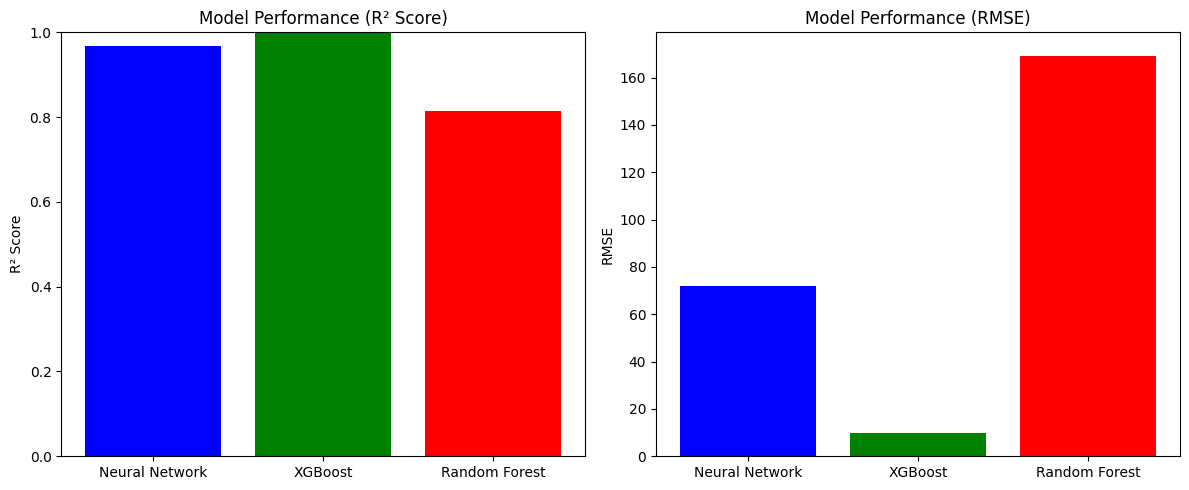

In [15]:


# Extract results for plotting
models = results_df["Model"]
r2_scores = results_df["R2 Score"]
rmse_scores = results_df["RMSE"]

# Create subplots
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

# Bar plot for R² Scores
ax[0].bar(models, r2_scores, color=['blue', 'green', 'red'])
ax[0].set_title("Model Performance (R² Score)")
ax[0].set_ylabel("R² Score")
ax[0].set_ylim(0, 1)  # R² Score ranges from 0 to 1

# Bar plot for RMSE Scores
ax[1].bar(models, rmse_scores, color=['blue', 'green', 'red'])
ax[1].set_title("Model Performance (RMSE)")
ax[1].set_ylabel("RMSE")
ax[1].set_ylim(0, max(rmse_scores) + 10)  # Adjusting RMSE range for visibility

plt.tight_layout()
plt.show()


In [16]:
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
import numpy as np

# Step 1: Generate predictions on test set
y_pred_nn = nn_model.predict(X_test).flatten()  # Keras models return array of arrays
y_pred_xgb = xgb_model.best_estimator_.predict(X_test)
y_pred_rf = rf_model.best_estimator_.predict(X_test)

# Step 2: Calculate metrics for each model
models = ["Neural Network", "XGBoost", "Random Forest"]
r2_scores = [
    r2_score(y_test, y_pred_nn),
    r2_score(y_test, y_pred_xgb),
    r2_score(y_test, y_pred_rf)
]
rmse_scores = [
    np.sqrt(mean_squared_error(y_test, y_pred_nn)),
    np.sqrt(mean_squared_error(y_test, y_pred_xgb)),
    np.sqrt(mean_squared_error(y_test, y_pred_rf))
]

# Step 3: Create a DataFrame for comparison
results_df = pd.DataFrame({
    "Model": models,
    "R2 Score": r2_scores,
    "RMSE": rmse_scores
})

# Step 4: Determine the best model by highest R² score
best_model_name = results_df.loc[results_df["R2 Score"].idxmax(), "Model"]

print("Model Comparison:\n", results_df)
print(f"\n✅ Best model based on R² Score: {best_model_name}")


188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Model Comparison:
             Model  R2 Score        RMSE
0  Neural Network  0.966626   71.808579
1         XGBoost  0.999377    9.807773
2   Random Forest  0.814845  169.136719

✅ Best model based on R² Score: XGBoost


In [19]:
import pickle
import os
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Set the model (replace this with rf_model.best_estimator_ if Random Forest is best)
best_model = xgb_model.best_estimator_

# Define save path
save_path = "/content/drive/MyDrive/IPM/best_model_for_orange_shap_lime.pkl"

# Save the model
with open(save_path, "wb") as f:
    pickle.dump(best_model, f)

print(f"✅ Model saved at: {save_path}")



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
✅ Model saved at: /content/drive/MyDrive/IPM/best_model_for_orange_shap_lime.pkl


In [20]:
from sklearn.pipeline import Pipeline
import pickle

# Wrap the preprocessor and best model together
final_model = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', best_model)  # e.g., xgb_model.best_estimator_
])

# Save it
save_path = "/content/drive/MyDrive/IPM/IPM_model_with_preprocessing.pkl"

with open(save_path, "wb") as f:
    pickle.dump(final_model, f)

print(f"✅ Final pipeline saved at: {save_path}")


✅ Final pipeline saved at: /content/drive/MyDrive/IPM/IPM_model_with_preprocessing.pkl
